# Conformational analysis of mammal 80S ribosome at 1pt level

In [1]:
colab=False
local_relative_path='./'
project_name='Ribosome_80S_mammal'

In [9]:
%matplotlib inline
import glob, os
import numpy as np
from PDBClean import pdbclean_io as pcio
from PDBClean import pdbclean_process as pcx
from PDBClean import pdbclean_cifutils as cif
from PDBClean import pdbclean_analysis as analysis

## Extract 1pt level description of dataset

In [3]:
RUNDIR  = pcio.define_rundir(local_relative_path, colab=colab)
PROJDIR = RUNDIR+project_name
pcio.check_project(projdir=PROJDIR, action='create', level='1pt_bank')

./Ribosome_80S_mammal/1pt_bank already exists, with content:
['info.txt', '3j7p+00.cif', '3j7r+00.cif', '3jag+00.cif', '3jah+00.cif', '3jai+00.cif', '3jaj+00.cif', '3jan+00.cif', '4ug0+00.cif', '4ujc+00.cif', '4ujd+00.cif', '4uje+00.cif', '4v6x+00.cif', '5aj0+00.cif', '5lks+00.cif', '5lzs+00.cif', '5lzt+00.cif', '5lzu+00.cif', '5lzv+00.cif', '5lzw+00.cif', '5lzx+00.cif', '5lzy+00.cif', '5lzz+00.cif', '5t2c+00.cif', '6d90+00.cif', '6d9j+00.cif', '6ek0+00.cif', '6gz3+00.cif', '6gz4+00.cif', '6gz5+00.cif', '6hcf+00.cif', '6hcj+00.cif', '6hcm+00.cif', '6hcq+00.cif', '6ip5+00.cif', '6ip6+00.cif', '6ip8+00.cif', '6mtb+00.cif', '6mtc+00.cif', '6mtd+00.cif', '6mte+00.cif', '6qzp+00.cif']


In [ ]:
pcx.process(projdir=PROJDIR, source='nick_curated_bank', target='1pt_bank',
            verbose=True, show=True,
            step='select', chains=('X','Y','Z'), atoms=('P',))

## Load as a trajectory to analyse

In [5]:
pcio.check_project(projdir=PROJDIR, action='create', level='1pt_bank_analysis')

./Ribosome_80S_mammal/1pt_bank_analysis already exists, with content:
['info.txt', '3j7p+00.pdb', '3j7r+00.pdb', '3jag+00.pdb', '3jah+00.pdb', '3jai+00.pdb', '3jaj+00.pdb', '3jan+00.pdb', '4ug0+00.pdb', '4ujc+00.pdb', '4ujd+00.pdb', '4uje+00.pdb', '4v6x+00.pdb', '5aj0+00.pdb', '5lks+00.pdb', '5lzs+00.pdb', '5lzt+00.pdb', '5lzu+00.pdb', '5lzv+00.pdb', '5lzw+00.pdb', '5lzx+00.pdb', '5lzy+00.pdb', '5lzz+00.pdb', '5t2c+00.pdb', '6d90+00.pdb', '6d9j+00.pdb', '6ek0+00.pdb', '6gz3+00.pdb', '6gz4+00.pdb', '6gz5+00.pdb', '6hcf+00.pdb', '6hcj+00.pdb', '6hcm+00.pdb', '6hcq+00.pdb', '6ip5+00.pdb', '6ip6+00.pdb', '6ip8+00.pdb', '6mtb+00.pdb', '6mtc+00.pdb', '6mtd+00.pdb', '6mte+00.pdb', '6qzp+00.pdb', 'job_cluster.png', 'jobcluster_1_mean.pdb', 'jobcluster_2_mean.pdb', 'jobcluster_3_mean.pdb', 'job_pca_stats.png', 'job_biplot.png', 'job_oscillatory_PC1.pdb', 'job_oscillatory_PC2.pdb', 'job_oscillatory_PC3.pdb', 'job_oscillatory_PC4.pdb', 'job_oscillatory_PC5.pdb']


In [6]:
traj = analysis.initialize(projdir=PROJDIR, source='1pt_bank', target='1pt_bank_analysis')

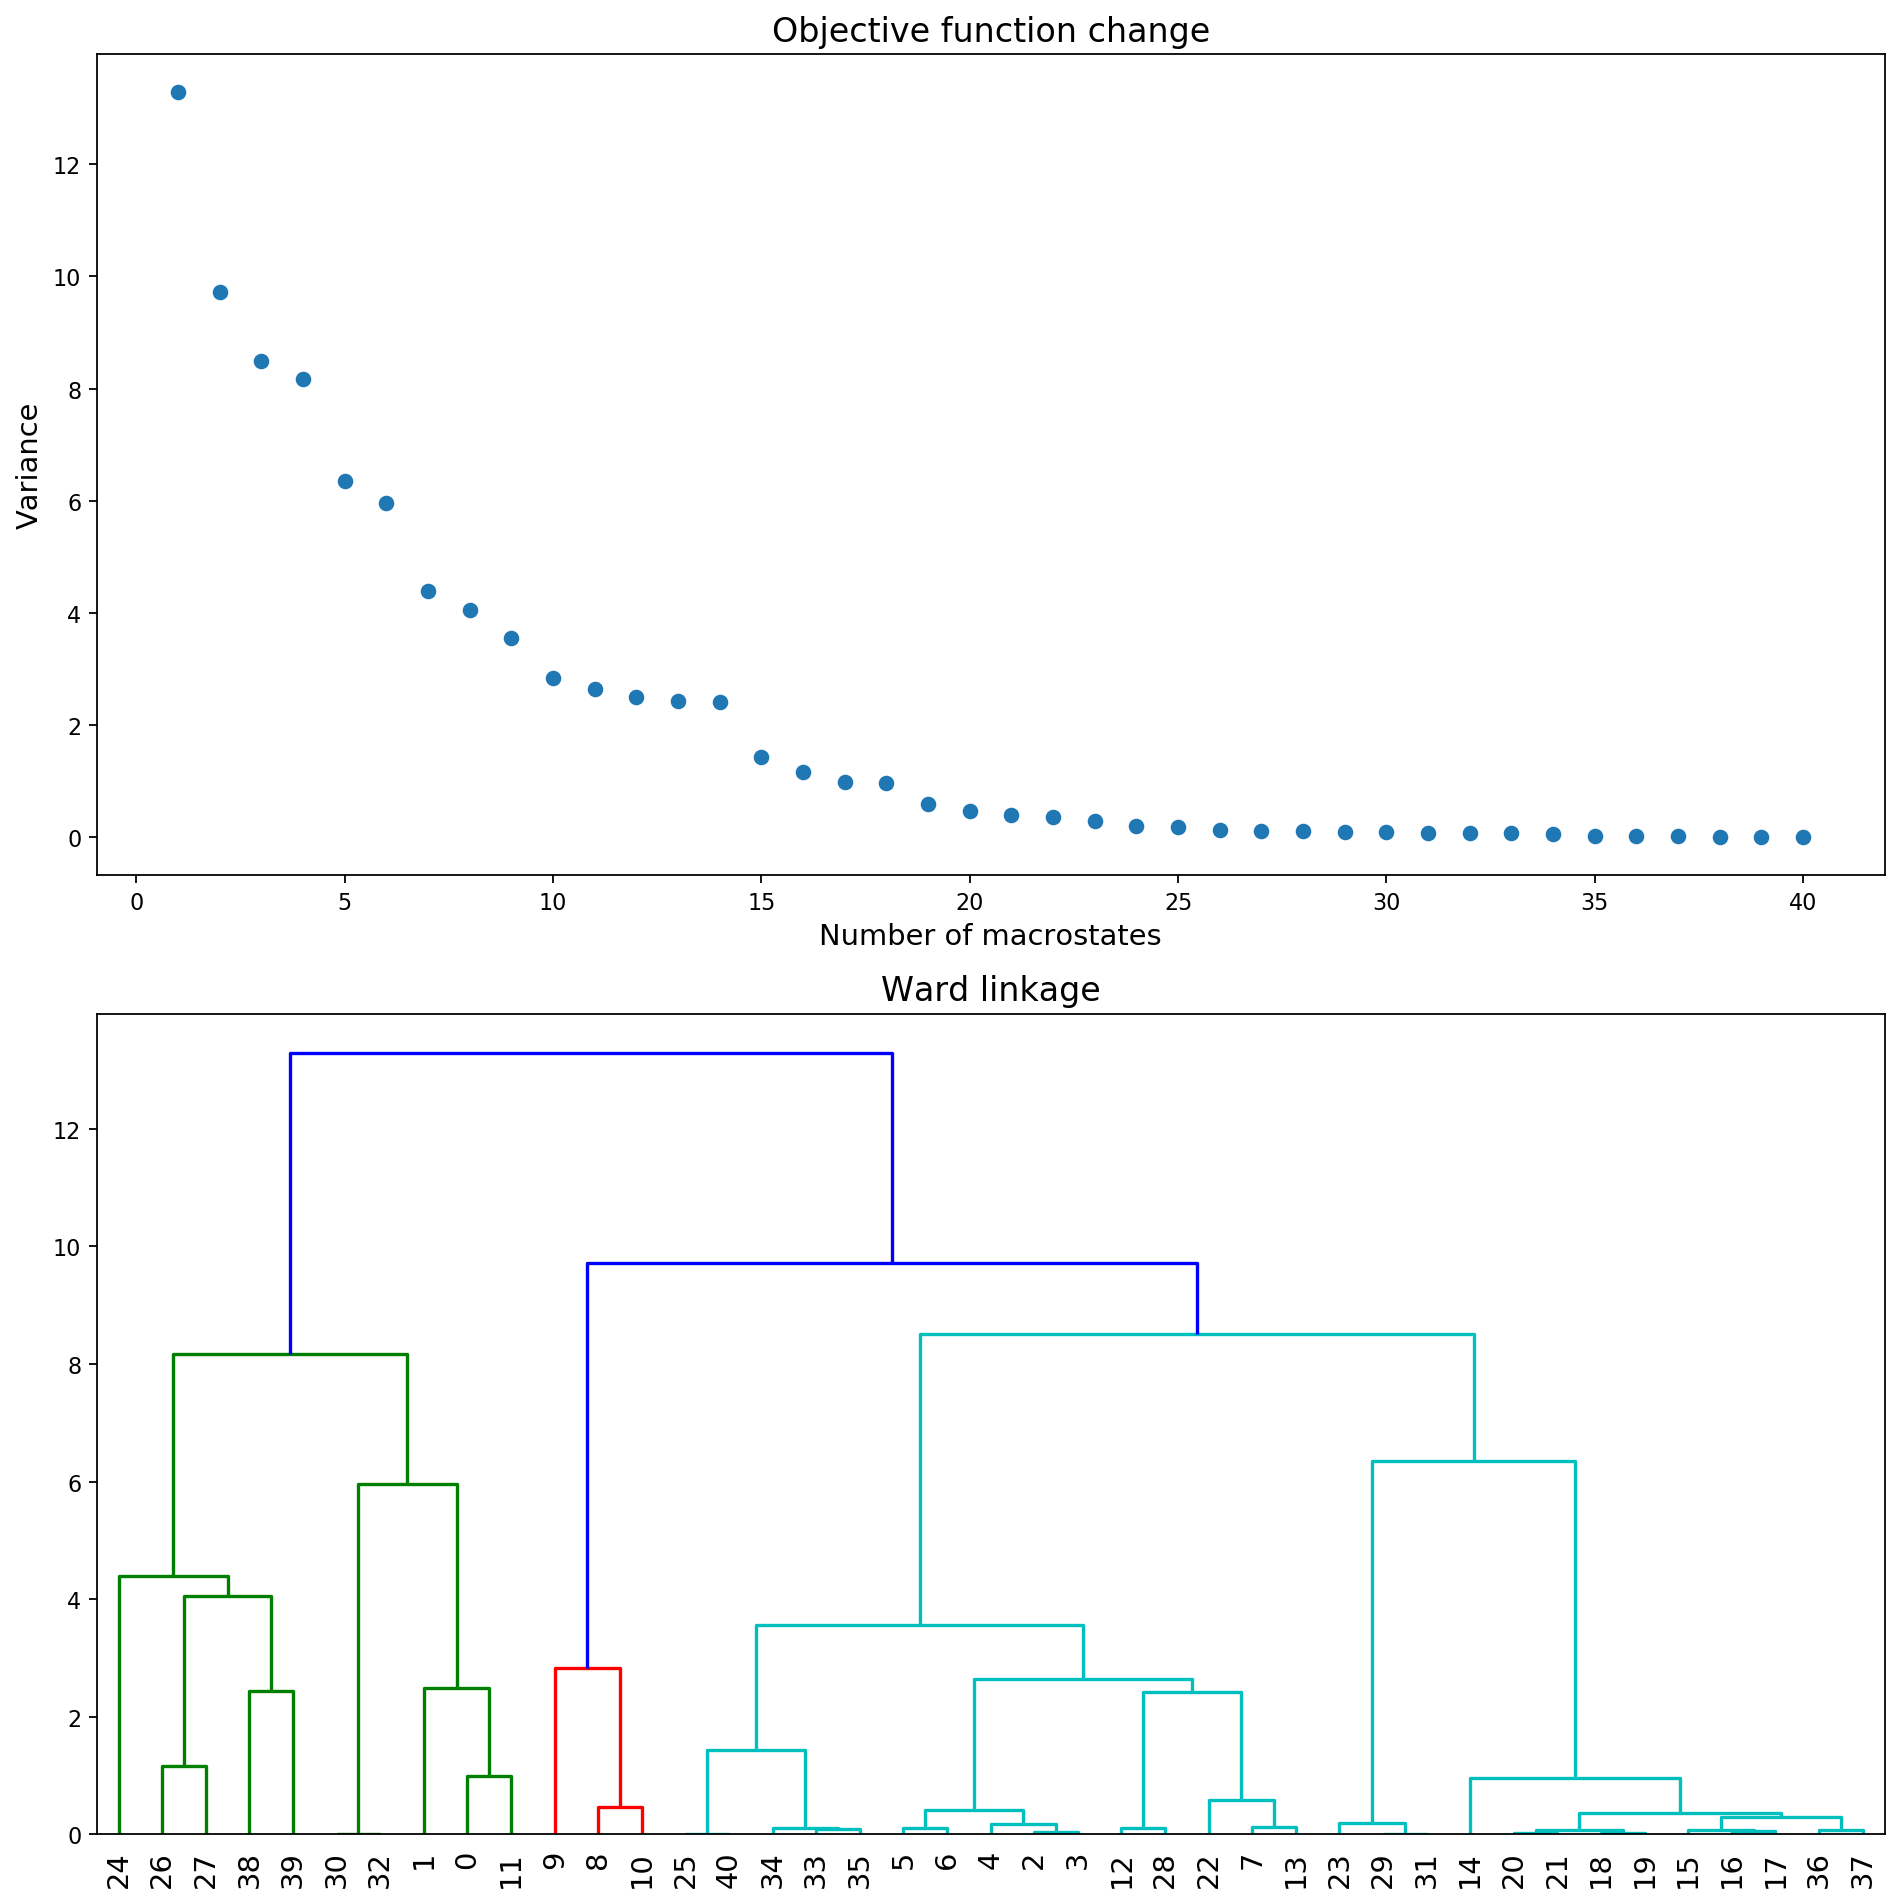

In [7]:
clusters = analysis.cluster(traj,title=PROJDIR+'/1pt_bank_analysis/job',pc_thresh=0.9,analysis_type='pca')

> ./Ribosome_80S_mammal/1pt_bank_analysis/jobcluster_1
wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/jobcluster_1_mean.pdb
> ./Ribosome_80S_mammal/1pt_bank_analysis/jobcluster_2
wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/jobcluster_2_mean.pdb
> ./Ribosome_80S_mammal/1pt_bank_analysis/jobcluster_3
wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/jobcluster_3_mean.pdb
Principal Component Analysis (step 0)


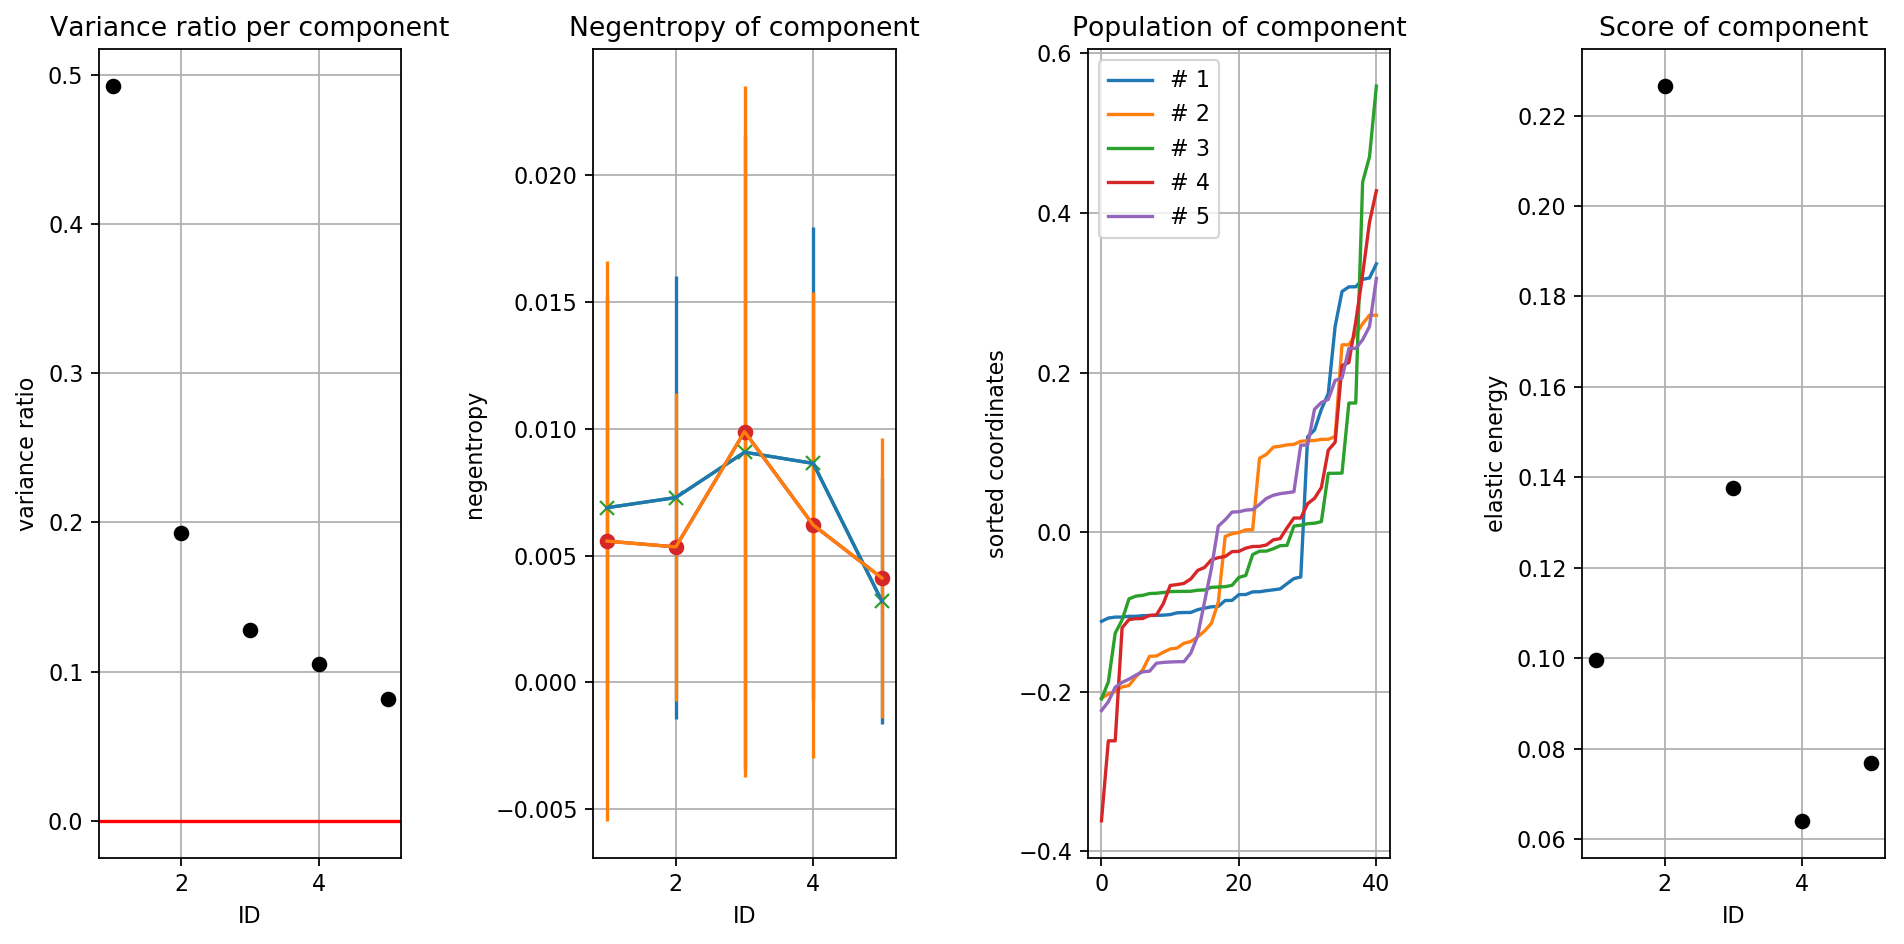

projection of data in component space


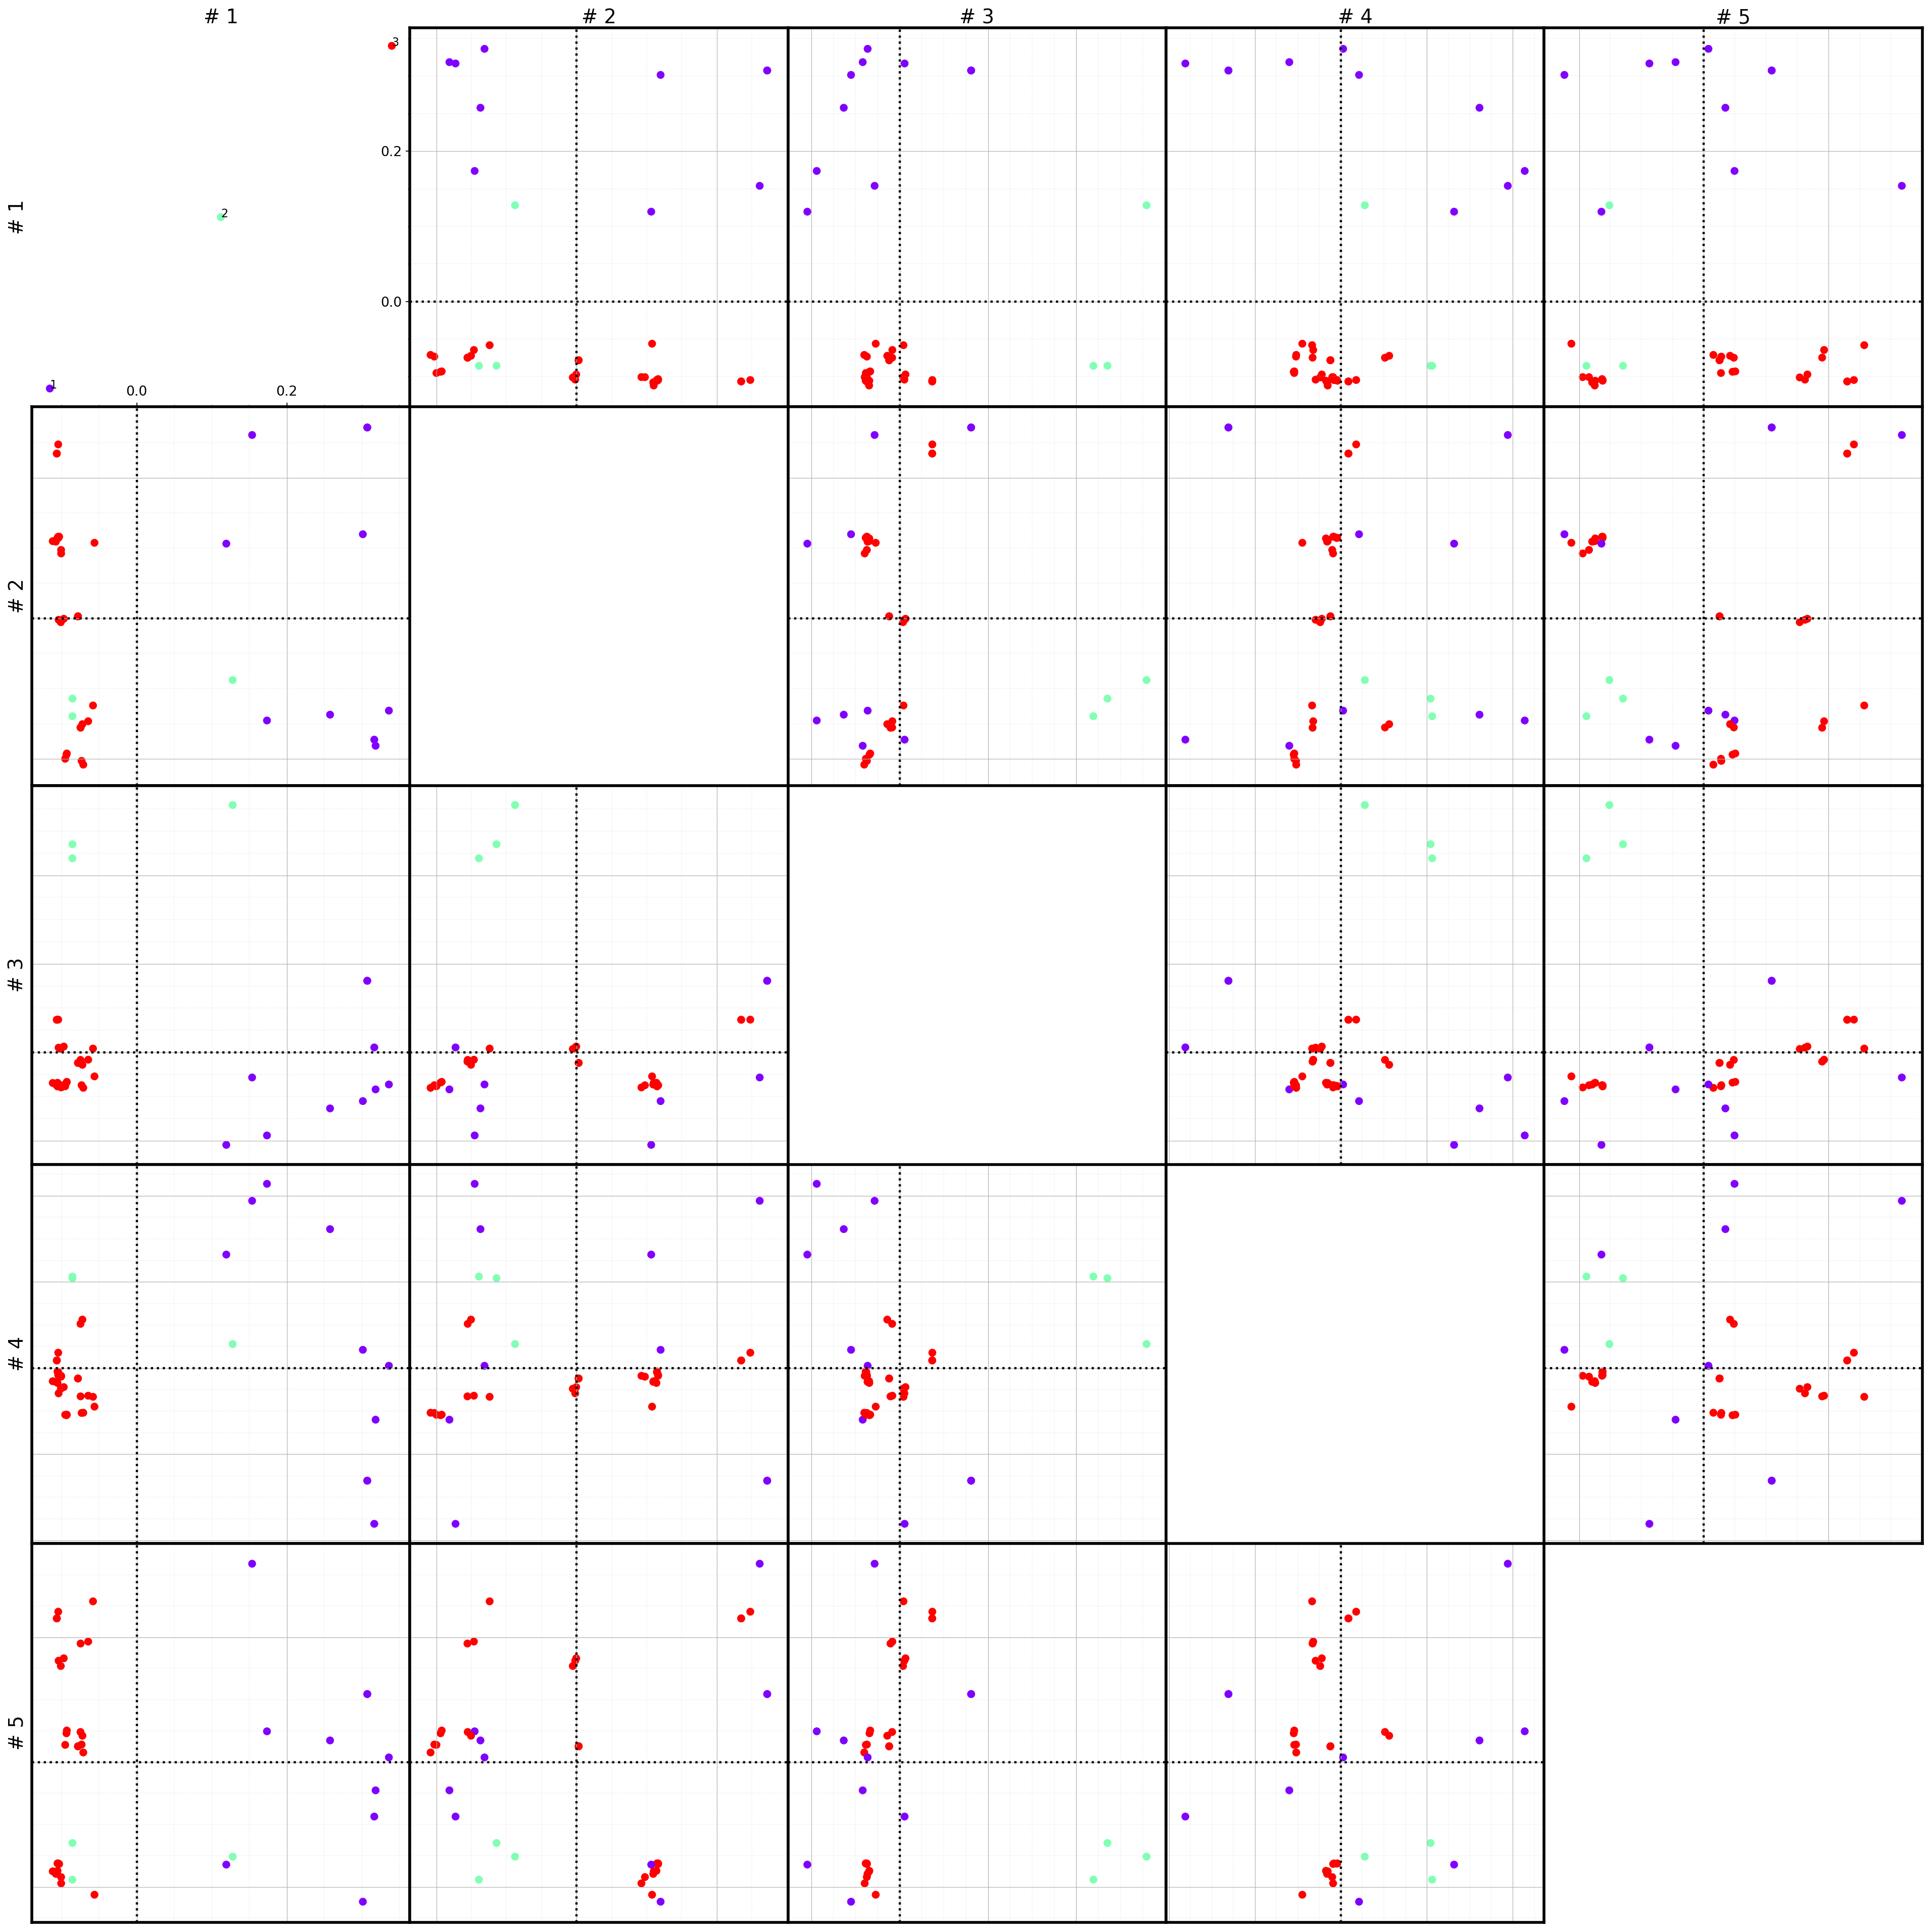

wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/job_oscillatory_PC1.pdb
wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/job_oscillatory_PC2.pdb
wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/job_oscillatory_PC3.pdb
wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/job_oscillatory_PC4.pdb
wrote  ./Ribosome_80S_mammal/1pt_bank_analysis/job_oscillatory_PC5.pdb


In [10]:
n_clusters=3
analysis.cluster_split(traj,clusters,n_clusters,title=PROJDIR+'/1pt_bank_analysis/job')
assignment = analysis.get_assignment(clusters,n_clusters)
v, m, x = analysis.analyses(traj,c=assignment,title=PROJDIR+'/1pt_bank_analysis/job',pc_thresh=0.9,analysis_type='pca')
analysis.save_mode(traj,x,v=v,n=np.arange(x.shape[1]),pc_thresh=0.9,movie='oscillatory',keyword=PROJDIR+'/1pt_bank_analysis/job',verbose='intermediate',analysis_type='pca')